{'Iraq': 22130, 'Pakistan': 13634, 'Afghanistan': 11306, 'India': 10978, 'Colombia': 8163, 'Philippines': 6212, 'Peru': 6088, 'El Salvador': 5320, 'United Kingdom': 5098, 'Turkey': 4106}


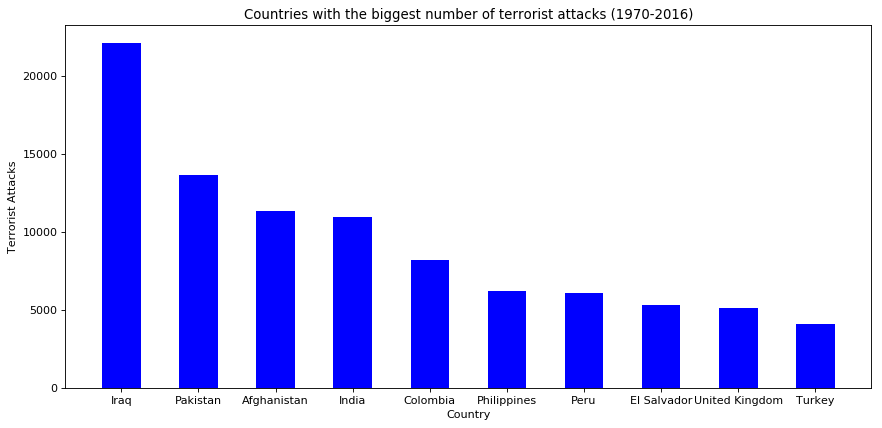

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

terror_data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', usecols=[0, 1, 8, 29, 35, 98, 101])
    
terror_data = terror_data.rename(columns={'eventid':'id', 'iyear':'year', 'country_txt':'country', 'attacktype1_txt':'attack', 'targtype1_txt':'target', 'nkill':'fatalities', 'nwound':'injuries'})
terror_data['fatalities'] = terror_data['fatalities'].fillna(0).astype(int)
terror_data['injuries'] = terror_data['injuries'].fillna(0).astype(int)

count_country = terror_data.groupby(['country']).count()
count_country = count_country.sort_values('id', 0, False)[:10]
attacks = {count_country.index[i] : count_country.id[i] for i in range(10)}
print(attacks)

plt.figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(attacks)), attacks.values(), 0.5, color="blue")
plt.xticks(range(len(attacks)), attacks.keys())
plt.xlabel('Country')
plt.ylabel('Terrorist Attacks')
plt.title('Countries with the biggest number of terrorist attacks (1970-2016)')
plt.show()

{'Armed Assault': 2959, 'Assassination': 1233, 'Bombing/Explosion': 16399, 'Facility/Infrastructure Attack': 131, 'Hijacking': 10, 'Hostage Taking (Barricade Incident)': 22, 'Hostage Taking (Kidnapping)': 828, 'Unarmed Assault': 4}


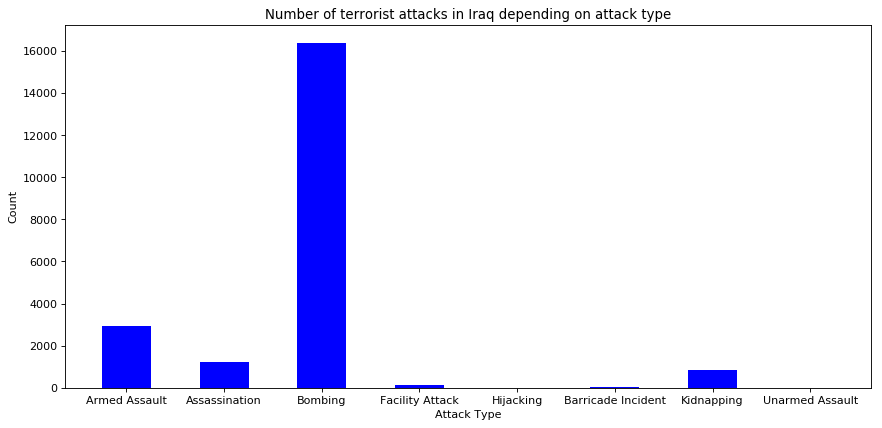

{'Armed Assault': 4.3799999999999999, 'Assassination': 3.2400000000000002, 'Bombing/Explosion': 10.369999999999999, 'Facility/Infrastructure Attack': 2.1400000000000001, 'Hijacking': 2.0, 'Hostage Taking (Barricade Incident)': 23.140000000000001, 'Hostage Taking (Kidnapping)': 9.5299999999999994, 'Unarmed Assault': 0.75}


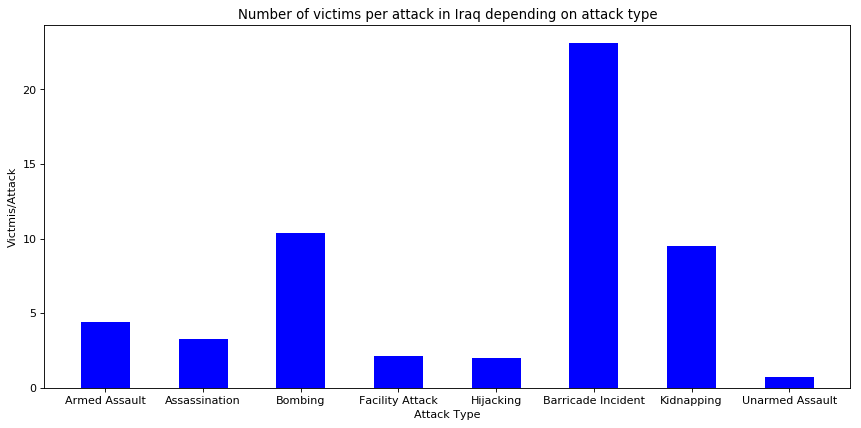

In [3]:
terror_iraq = terror_data.loc[terror_data['country'] == "Iraq"]
count_attack_type = terror_iraq.groupby(['attack']).count()
attack_num = {count_attack_type.index[i] : count_attack_type.id[i] for i in range(len(count_attack_type)-1)}
print(attack_num)

labels = ['Armed Assault', 'Assassination', 'Bombing', 'Facility Attack', 'Hijacking', 'Barricade Incident', 'Kidnapping', 'Unarmed Assault']

plt.figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(attack_num)), attack_num.values(), 0.5, color="blue")
plt.xticks(range(len(labels)), labels)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Number of terrorist attacks in Iraq depending on attack type')
plt.show()

sum_attack_type = terror_iraq.groupby(['attack']).sum()
attack_victims = {sum_attack_type.index[i] : sum_attack_type.fatalities[i] + sum_attack_type.injuries[i] for i in range(len(sum_attack_type)-1)}

victims_per_attack = {count_attack_type.index[i] : round(attack_victims.get(count_attack_type.index[i]) / attack_num.get(count_attack_type.index[i]), 2) for i in range(len(sum_attack_type)-1)}
print(victims_per_attack)

plt.figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(victims_per_attack)), victims_per_attack.values(), 0.5, color="blue")
plt.xticks(range(len(labels)), labels)
plt.xlabel('Attack Type')
plt.ylabel('Victmis/Attack')
plt.title('Number of victims per attack in Iraq depending on attack type')
plt.show()

{1976: 1, 1977: 0, 1978: 0, 1979: 0, 1980: 3, 1981: 0, 1982: 3, 1983: 3, 1984: 1, 1985: 0, 1986: 0, 1987: 0, 1988: 2, 1989: 3, 1990: 0, 1991: 1, 1992: 10, 1993: 0, 1994: 11, 1995: 12, 1996: 6, 1997: 6, 1998: 6, 1999: 8, 2000: 8, 2001: 3, 2002: 4, 2003: 69, 2004: 195, 2005: 329, 2006: 499, 2007: 737, 2008: 829, 2009: 913, 2010: 853, 2011: 816, 2012: 1118, 2013: 2127, 2014: 2866, 2015: 2198, 2016: 2759}


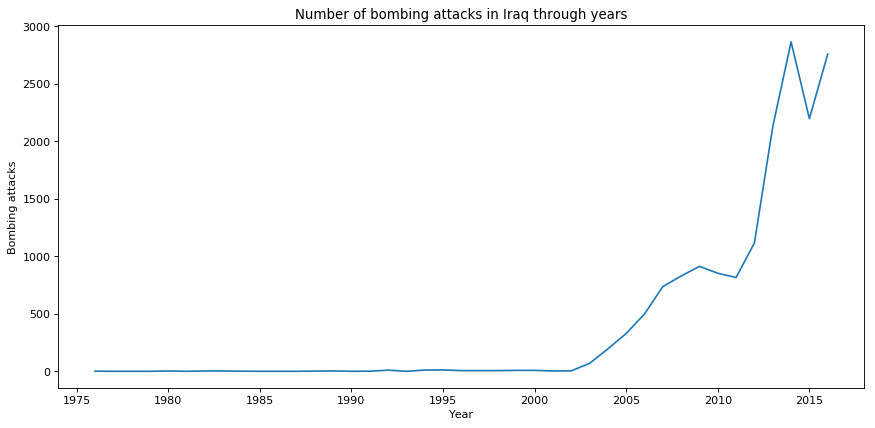

In [12]:
terror_iraq_bombing = terror_iraq.loc[terror_iraq['attack'] == "Bombing/Explosion"]
count_bombing_year = terror_iraq_bombing.groupby(['year']).count()

bombing_year = {y : (count_bombing_year.loc[y].id if y in count_bombing_year.index else 0) for y in range(1976,2017)}
print(bombing_year)
years = [int(k) for k in bombing_year.keys()]
bombings = [int(k) for k in bombing_year.values()]
plt.figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(years, bombings)
plt.xlabel('Year')
plt.ylabel('Bombing attacks')
plt.title('Number of bombing attacks in Iraq through years')
plt.show()

{'Iraq': {'Private Citizens & Property': 7794}, 'Pakistan': {'Private Citizens & Property': 3273}, 'Afghanistan': {'Police': 3116}, 'India': {'Private Citizens & Property': 2904}, 'Colombia': {'Private Citizens & Property': 1545}, 'Philippines': {'Military': 1364}, 'Peru': {'Business': 1164}, 'El Salvador': {'Military': 1570}, 'United Kingdom': {'Private Citizens & Property': 1580}, 'Turkey': {'Military': 881}}


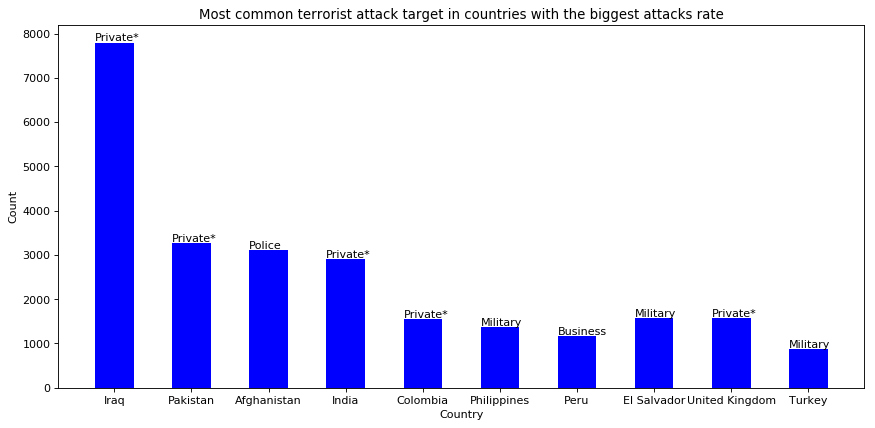

*Private Citizens & Property


In [16]:
countries = count_country.index
count_targets = terror_data.groupby(['target']).count()
targets = count_targets.index
array_data = np.array({})

for i in range(len(countries)): 
    data = terror_data.loc[terror_data['country'] == countries[i]]
    data_target = data.groupby(['target']).count()
    array_data = np.append(array_data, {countries[i] : {data_target.index[j] : data_target.id[j] for j in range(len(data_target.index))}})

array_data = np.delete(array_data, 0)

country_target = {[str(s) for s in array_data[i].keys()][0] : {max(array_data[i][[str(s) for s in array_data[i].keys()][0]], key=array_data[i][[str(s) for s in array_data[i].keys()][0]].get) : array_data[i][[str(s) for s in array_data[i].keys()][0]][max(array_data[i][[str(s) for s in array_data[i].keys()][0]], key=array_data[i][[str(s) for s in array_data[i].keys()][0]].get)]} for i in range(len(array_data))}

country_tar = {[str(s) for s in country_target.keys()][i] : [str(s) for s in country_target[[str(s) for s in country_target.keys()][i]].keys()][0] if [str(s) for s in country_target[[str(s) for s in country_target.keys()][i]].keys()][0] != 'Private Citizens & Property' else 'Private*' for i in range(len(country_target))}
country_num = {[str(s) for s in country_target.keys()][i] : country_target[[str(s) for s in country_target.keys()][i]][[str(s) for s in country_target[[str(s) for s in country_target.keys()][i]].keys()][0]] for i in range(len(country_target))}
print(country_target)
plt.figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.bar(range(len(country_num)), country_num.values(), 0.5, color="blue")
plt.bar(range(len(country_num)), country_num.values(), 0.5, color="blue")
plt.xticks(range(len(country_num)), country_num.keys())
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Most common terrorist attack target in countries with the biggest attacks rate')
p = ax.patches
for i in range(len(country_num)):
    plt.annotate(country_tar[countries[i]], xy=(p[i].get_x(), p[i].get_height()+35))
plt.show()
print('*Private Citizens & Property')

{1970: 57, 1971: 23, 1972: 142, 1973: 127, 1974: 130, 1975: 135, 1976: 157, 1977: 223, 1978: 143, 1979: 386, 1980: 430, 1981: 401, 1982: 459, 1983: 483, 1984: 607, 1985: 384, 1986: 489, 1987: 511, 1988: 620, 1989: 772, 1990: 757, 1991: 687, 1992: 951, 1993: 0, 1994: 753, 1995: 788, 1996: 665, 1997: 874, 1998: 280, 1999: 381, 2000: 538, 2001: 674, 2002: 397, 2003: 259, 2004: 233, 2005: 444, 2006: 850, 2007: 964, 2008: 1601, 2009: 1664, 2010: 1473, 2011: 1431, 2012: 1684, 2013: 2462, 2014: 4261, 2015: 4027, 2016: 4217}


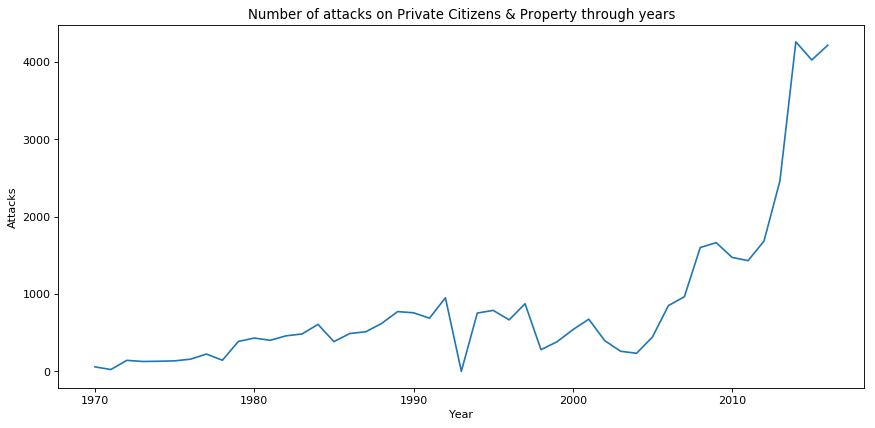

In [22]:
terror_private = terror_data.loc[terror_data['target'] == "Private Citizens & Property"]
count_private_year = terror_private.groupby(['year']).count()
private_year = {y : (count_private_year.loc[y].id if y in count_private_year.index else 0) for y in range(1970,2017)}
print(private_year)

years = [int(k) for k in private_year.keys()]
attacks = [int(k) for k in private_year.values()]
plt.figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(years, attacks)
plt.xlabel('Year')
plt.ylabel('Attacks')
plt.title('Number of attacks on Private Citizens & Property through years')
plt.show()